# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import requests
import time


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

print("***************************************************************************************")
# df.head(n).to_csv('yourfileout.csv', encoding='utf-8')
# logging.info('dataframe head - {}'.format(df.head()))
print("Do I need to include logging in addition to wrting out the .csv???")
print("***************************************************************************************")
    
# Print the city count to confirm sufficient count
print(len(cities))
print(cities)
print("*******************************************************************************************")
print("Temporarily reducging cities from cities to cities[0:10] so only get 10 cities intially")
print("before calling api.openweathermap.org since they have limits") 
print("I believe 60 calls/minute and 1M calls/month per month)")
cities = cities[0:10]
print("*******************************************************************************************")
print(cities)

***************************************************************************************
Do I need to include logging in addition to wrting out the .csv???
***************************************************************************************
583
['kaitangata', 'pevek', 'cape town', 'saldanha', 'aras', 'zyryanskoye', 'iqaluit', 'venado tuerto', 'batticaloa', 'atuona', 'svetlaya', 'manbij', 'biak', 'sokoto', 'arraial do cabo', 'hobart', 'makat', 'simao', 'northam', 'ushuaia', 'barrow', 'rikitea', 'zhuanghe', 'mys shmidta', 'doha', 'faya', 'vanadzor', 'qaanaaq', 'cidreira', 'muros', 'pisco', 'asosa', 'norman wells', 'mrirt', 'katsuura', 'bengkulu', 'taolanaro', 'vaini', 'narsaq', 'celestun', 'toliary', 'yuksekova', 'punta arenas', 'codrington', 'kapaa', 'sao filipe', 'quatre cocos', 'tiksi', 'saint-joseph', 'hilo', 'hermanus', 'miri', 'new norfolk', 'jamestown', 'buala', 'illoqqortoormiut', 'bredasdorp', 'tasiilaq', 'yichang', 'port augusta', 'kavieng', 'deep river', 'balaipungut', 'kodi

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#city = "London"

#cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
lon = []
temp = []
humidity=[]
clouds=[]
wind=[]
city_counter=0

print("cities")
print(cities)
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        time.sleep(0.1)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])

        print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
        print(f"The longitude information for city {city} #{city_counter} received is: {lon}")
        print(f"The temperature information for city {city} #{city_counter} received is: {temp}")
        print(f"The humidty information for city {city} #{city_counter} received is: {humidity}")
        print(f"The cloudiness information for city {city} #{city_counter} received is: {clouds}")
        print(f"The windiness information for city {city} #{city_counter} received is: {wind}")

        city_counter+=1
    except KeyError:
        print("Oops!  That might not be a valid coord.  Try again...")
        
    
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city  

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

cities
['kaitangata', 'pevek', 'cape town', 'saldanha', 'aras', 'zyryanskoye', 'iqaluit', 'venado tuerto', 'batticaloa', 'atuona']
The latitude information for city kaitangata #0 received is: [-46.2817]
The longitude information for city kaitangata #0 received is: [169.8464]
The temperature information for city kaitangata #0 received is: [14.97]
The humidty information for city kaitangata #0 received is: [99]
The cloudiness information for city kaitangata #0 received is: [100]
The windiness information for city kaitangata #0 received is: [4.09]
The latitude information for city pevek #1 received is: [-46.2817, 69.7008]
The longitude information for city pevek #1 received is: [169.8464, 170.3133]
The temperature information for city pevek #1 received is: [14.97, -34.67]
The humidty information for city pevek #1 received is: [99, 100]
The cloudiness information for city pevek #1 received is: [100, 99]
The windiness information for city pevek #1 received is: [4.09, 1.66]
The latitude info

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

 # create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind 
}
weather_data = pd.DataFrame(weather_dict)

print("*******************************************************************************************")
print("Temporarily printing out weather_data.head() just below to see table data in this cell,")
print("but can remove the line below later since basically in the next cell")
print("*******************************************************************************************")
print(weather_data.head())


# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

*******************************************************************************************
Temporarily printing out weather_data.head() just below to see table data in this cell,
but can remove the line below later since basically in the next cell
*******************************************************************************************
         city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0  kaitangata -46.2817  169.8464  14.97        99         100        4.09
1       pevek  69.7008  170.3133 -34.67       100          99        1.66
2   cape town -33.9258   18.4232  20.71        75          20        1.54
3    saldanha -33.0117   17.9442  18.90        86           5        2.68
4        aras  42.5617   -2.3560  -1.57       100           0        0.00


In [5]:
# Display the DataFrame
weather_data

,city,lat,lon,temp,Humidity,Cloudiness,Wind Speed
0,kaitangata,-46.2817,169.8464,14.97,99,100,4.09
1,pevek,69.7008,170.3133,-34.67,100,99,1.66
2,cape town,-33.9258,18.4232,20.71,75,20,1.54
3,saldanha,-33.0117,17.9442,18.90,86,5,2.68
4,aras,42.5617,-2.3560,-1.57,100,0,0.00
5,zyryanskoye,56.8306,86.6258,-17.12,83,38,4.52
6,iqaluit,63.7506,-68.5145,-19.06,84,100,0.96
7,venado tuerto,-33.7456,-61.9688,15.43,56,98,3.50
8,batticaloa,7.7102,81.6924,26.44,71,100,5.66
9,atuona,-9.8000,-139.0333,25.83,74,0,7.56


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


In [6]:
cities_high_humidity = []
city_counter=0
print("*******************************************************************************************")
print("Need to change humidity[city_counter]) > 80 from 80 to 100")
print("*******************************************************************************************")
for city in cities:
    if int(humidity[city_counter]) > 80:
        print(f"The humidty information for city {city} #{city_counter} received is: {humidity[city_counter]}")
        # Create a new list to track high humifity index values
        cities_high_humidity.append(city_counter)
        print(f"{city} with city_counter of {city_counter} has humidty >80 so need to remove later")
    else:
        print("Skip since no humidity >80")
    city_counter+=1
print("Latest cities_high_humidity")
print(cities_high_humidity)

*******************************************************************************************
Need to change humidity[city_counter]) > 80 from 80 to 100
*******************************************************************************************
The humidty information for city kaitangata #0 received is: 99
kaitangata with city_counter of 0 has humidty >80 so need to remove later
The humidty information for city pevek #1 received is: 100
pevek with city_counter of 1 has humidty >80 so need to remove later
Skip since no humidity >80
The humidty information for city saldanha #3 received is: 86
saldanha with city_counter of 3 has humidty >80 so need to remove later
The humidty information for city aras #4 received is: 100
aras with city_counter of 4 has humidty >80 so need to remove later
The humidty information for city zyryanskoye #5 received is: 83
zyryanskoye with city_counter of 5 has humidty >80 so need to remove later
The humidty information for city iqaluit #6 received is: 84
iqaluit

In [7]:
#  Get the indices of cities that have humidity over 100%.
print("Latest cities_high_humidity")
print(cities_high_humidity)

Latest cities_high_humidity
[0, 1, 3, 4, 5, 6]


In [8]:
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data
if len(cities_high_humidity) > 0:
    print(f"have high humidity data for city index #(s) {cities_high_humidity}")
    # dropping a row(s) from actual dataframe
    #df.drop(['c', 'd'], inplace = True )
    clean_city_data=clean_city_data.drop(cities_high_humidity, inplace=False) 
else:
    print("No high humidity data") 
print("weather_data") 
print(weather_data)
print()
print("clean_city_data") 
print(clean_city_data)
print()

clean_city_data.reset_index(inplace=True)
print("clean_city_data after reset index") 
print(clean_city_data)

#print("dtypes()")
#print(clean_city_data.dtypes)

have high humidity data for city index #(s) [0, 1, 3, 4, 5, 6]
weather_data
            city      lat       lon   temp  Humidity  Cloudiness  Wind Speed
0     kaitangata -46.2817  169.8464  14.97        99         100        4.09
1          pevek  69.7008  170.3133 -34.67       100          99        1.66
2      cape town -33.9258   18.4232  20.71        75          20        1.54
3       saldanha -33.0117   17.9442  18.90        86           5        2.68
4           aras  42.5617   -2.3560  -1.57       100           0        0.00
5    zyryanskoye  56.8306   86.6258 -17.12        83          38        4.52
6        iqaluit  63.7506  -68.5145 -19.06        84         100        0.96
7  venado tuerto -33.7456  -61.9688  15.43        56          98        3.50
8     batticaloa   7.7102   81.6924  26.44        71         100        5.66
9         atuona  -9.8000 -139.0333  25.83        74           0        7.56

clean_city_data
            city      lat       lon   temp  Humidity  Cloudi

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

clean_city_data
   index           city      lat       lon   temp  Humidity  Cloudiness  \
0      2      cape town -33.9258   18.4232  20.71        75          20   
1      7  venado tuerto -33.7456  -61.9688  15.43        56          98   
2      8     batticaloa   7.7102   81.6924  26.44        71         100   
3      9         atuona  -9.8000 -139.0333  25.83        74           0   

   Wind Speed  
0        1.54  
1        3.50  
2        5.66  
3        7.56  
************************************************************
Should I convert temp from Celsius to Fahrenheit to make it easier to understand???
using somethink like f_temp=(temp*1.8)+32
If so, do it once up front and replace temp ewith f_temp below
else have to add conversion for this plus all graphs below
************************************************************


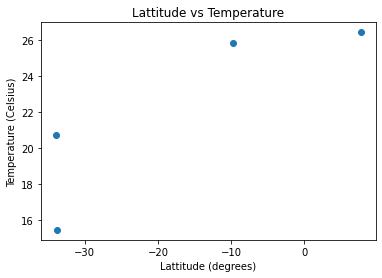

In [9]:
print("clean_city_data") 
print(clean_city_data)
print("************************************************************")
print("Should I convert temp from Celsius to Fahrenheit to make it easier to understand???")
print("using somethink like f_temp=(temp*1.8)+32")
print("If so, do it once up front and replace temp ewith f_temp below") 
print("else have to add conversion for this plus all graphs below")
print("************************************************************")

# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["temp"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')
# Save the figure
plt.savefig("output_data/lat_temp.png")
# Display the garph
plt.show()

## Latitude vs. Humidity Plot

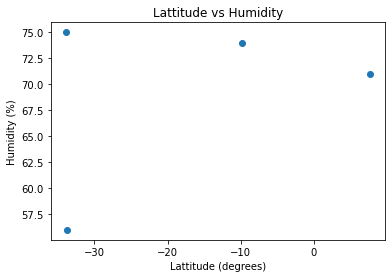

In [10]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Humidity"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title('Lattitude vs Humidity')
# Save the figure
plt.savefig("output_data/lat_hum.png")
# Display the garph
plt.show()

## Latitude vs. Cloudiness Plot

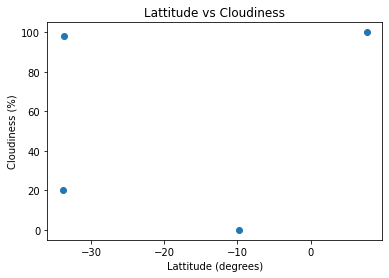

In [11]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Cloudiness"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title('Lattitude vs Cloudiness')
# Save the figure
plt.savefig("output_data/lat_cloud.png")
# Display the garph
plt.show()

## Latitude vs. Wind Speed Plot

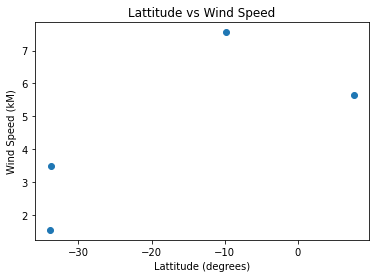

In [12]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Wind Speed"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Wind Speed (kM)")
plt.title('Lattitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/lat_wind.png")
# Display the garph
plt.show()

## Linear Regression

The correlation between both factors is 0.86
line_eq is: y = 0.22x + 25.93


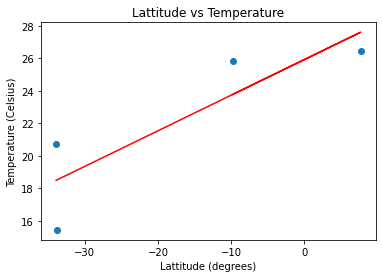

In [13]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = clean_city_data["lat"]
y_values = clean_city_data["temp"]



correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude)
# After each pair of plots, take the time to explain what the linear regression is modeling. 
# For example, describe any relationships you notice and any other analysis you may have.

# Set-up and initialize variables 

city_counter = 0

northern_city_counter = 0
northern_hemisphere_data = []

northern_hemisphere_city = []
northern_hemisphere_lat = []
northern_hemisphere_lon = []
northern_hemisphere_temp = []
northern_hemisphere_humidity = []
northern_hemisphere_clouds = []
northern_hemisphere_wind = []
print("*****************************")
print("Maybe I need to create a dictionary using {} e.g. northern_hemisphere_lat = {} ")
print("Would then need t modify my Northern and Southern for loops")

print("clean_city_data.head(10)")
print(clean_city_data.head(10))
print("len(clean_city_data)")
print(len(clean_city_data))


# Seperate into Northen Hemisphere or Southern Hemisphere
#for city in clean_city_data:
for city_counter in range(0, len(clean_city_data)):
    print('clean_city_data["city"][city_counter]')
    print(clean_city_data["city"][city_counter])
    print('clean_city_data["lat"][city_counter]')
    print(clean_city_data["lat"][city_counter])
    if clean_city_data["lat"][city_counter] >= 0:
        print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
        print(f'Lattitude for city {city[city_counter]} #{city_counter} is Northen Hemisphere: {clean_city_data["lat"][city_counter]}')
        # Create new DataFrames 
        # x_values = 
        # y_values = clean_city_data["temp"]
        northern_hemisphere_city.append(clean_city_data["city"][city_counter])
        northern_hemisphere_lat.append(clean_city_data["lat"][city_counter])
        northern_hemisphere_lon.append(clean_city_data["lon"][city_counter])
        northern_hemisphere_temp.append(clean_city_data["temp"][city_counter])
        northern_hemisphere_humidity.append(clean_city_data["Humidity"][city_counter])
        northern_hemisphere_clouds.append(clean_city_data["Cloudiness"][city_counter])
        northern_hemisphere_wind.append(clean_city_data["Wind Speed"][city_counter])
        northern_city_counter += 1
    city_counter+=1
 
print("clean_city_data.dtypes")
print(clean_city_data.dtypes)

print("northern_hemisphere_lat")
print(northern_hemisphere_lat)
print()
print("************************************************************")
print('can I use something like: rating = airport_df["Airport Rating"].astype(float) ???')
print("************************************************************")
print('or')
print("************************************************************")
print('can I use something like the code below and simplify???') 
    # # Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
    # # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
    # clean_city_data=weather_data
    # if len(cities_high_humidity) > 0:
    #     print(f"have high humidity data for city index #(s) {cities_high_humidity}")
    #     # dropping a row(s) from actual dataframe
    #     #df.drop(['c', 'd'], inplace = True )
    #     clean_city_data=clean_city_data.drop(cities_high_humidity, inplace=False) 
    # else:
    #     print("No high humidity data") 
    # print("weather_data") 
    # print(weather_data)
    # print()
    # print("clean_city_data") 
    # print(clean_city_data)
    # print()

    # clean_city_data.reset_index(inplace=True)
    # print("clean_city_data after reset index") 
    # print(clean_city_data)

    # #print("dtypes()")
    # #print(clean_city_data.dtypes)

print("************************************************************")

x_values = northern_hemisphere_lat.astype(float) 
y_values = northern_hemisphere_temp.astype(float) 

print("northern_hemisphere_lat.dtypes")
print(northern_hemisphere_lat.dtypes)
print()
print("northern_hemisphere_temp.dtypes")
print(northern_hemisphere_temp.dtypes)
print()

print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

*****************************
Maybe I need to create a dictionary using {} e.g. northern_hemisphere_lat = {} 
Would then need t modify my Northern and Southern for loops
clean_city_data.head(10)
   index           city      lat       lon   temp  Humidity  Cloudiness  \
0      2      cape town -33.9258   18.4232  20.71        75          20   
1      7  venado tuerto -33.7456  -61.9688  15.43        56          98   
2      8     batticaloa   7.7102   81.6924  26.44        71         100   
3      9         atuona  -9.8000 -139.0333  25.83        74           0   

   Wind Speed  
0        1.54  
1        3.50  
2        5.66  
3        7.56  
len(clean_city_data)
4
clean_city_data["city"][city_counter]
cape town
clean_city_data["lat"][city_counter]
-33.9258
clean_city_data["city"][city_counter]
venado tuerto
clean_city_data["lat"][city_counter]
-33.7456
clean_city_data["city"][city_counter]
batticaloa
clean_city_data["lat"][city_counter]
7.7102
The latitude information for city atuona 

AttributeError: 'list' object has no attribute 'astype'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:

city_counter = 0
southern_city_counter = 0
southern_hemisphere_city = []
southern_hemisphere_lat = []
southern_hemisphere_lon = []
southern_hemisphere_temp = []
southern_hemisphere_humidity = []
southern_hemisphere_clouds = []
southern_hemisphere_wind = []

for city_counter in range(0, len(clean_city_data)):
    if clean_city_data["lat"][city_counter] < 0:
        #print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
        print(f'Lattitude for city {city[city_counter]} #{city_counter} is Southern Hemisphere: {clean_city_data["lat"][city_counter]}')
        # Create a new DataFrame 
        southern_hemisphere_city.append(clean_city_data["city"][city_counter])
        southern_hemisphere_lat.append(clean_city_data["lat"][city_counter])
        southern_hemisphere_lon.append(clean_city_data["lon"][city_counter])
        southern_hemisphere_temp.append(clean_city_data["temp"][city_counter])
        southern_hemisphere_humidity.append(clean_city_data["Humidity"][city_counter])
        southern_hemisphere_clouds.append(clean_city_data["Cloudiness"][city_counter])
        southern_hemisphere_wind.append(clean_city_data["Wind Speed"][city_counter])
        southern_city_counter += 1
    city_counter+=1
print("southern_hemisphere_lat")
print(southern_hemisphere_lat)
print()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression